In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
pd.set_option('display.max_columns', 35)
pd.set_option('display.width', 1050)
import openpyxl as xls

In [2]:
#Store filepath as a variable
student_data = sorted(glob('student*.csv'))

student_data

['student-mat.csv', 'student-por.csv']

In [3]:
# Read our Data file with the pandas library
mergeddata = pd.concat(pd.read_csv(studentData).assign(sourcefilename = studentData)
                        for studentData in student_data)

In [4]:
#Display merged data as DataFrame
mergeddata.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,sourcefilename
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,student-mat.csv
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,student-mat.csv
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,student-mat.csv
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,student-mat.csv
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,student-mat.csv


In [5]:
#Exported dataframe to excel to verify all data merged correctly (better visual)
excel_file = pd.ExcelWriter("Student_new_file.xlsx")
mergeddata.to_excel(excel_file)
excel_file.save()

In [6]:
#Extract te Pstatus and failure columns from the main data frame
mergeddata2=pd.DataFrame(mergeddata.loc[:, ["Pstatus", "failures"]])
mergeddata2

,Pstatus,failures
0,A,0
1,T,0
2,T,3
3,T,0
4,T,0
...,...,...
644,T,1
645,T,0
646,T,0
647,T,0


In [7]:
pd.DataFrame(mergeddata2["Pstatus"].value_counts())

,Pstatus
T,923
A,121


In [8]:
pd.DataFrame(mergeddata2["failures"].value_counts())

,failures
0,861
1,120
2,33
3,30


In [9]:
by_failStatus = pd.DataFrame(mergeddata2.groupby("failures").Pstatus.value_counts(normalize=False))
by_failStatus

Pstatus
failures Pstatus         
0        T            760
         A            101
1        T            110
         A             10
2        T             26
         A              7
3        T             27
         A              3

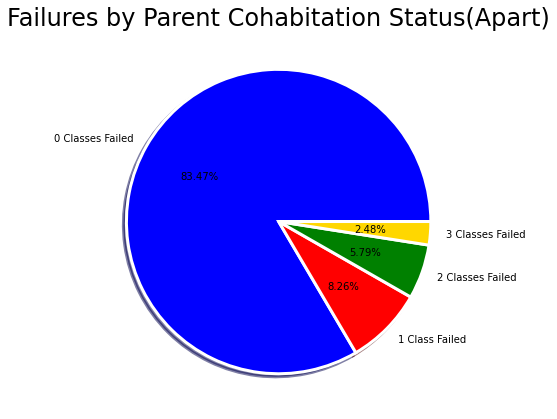

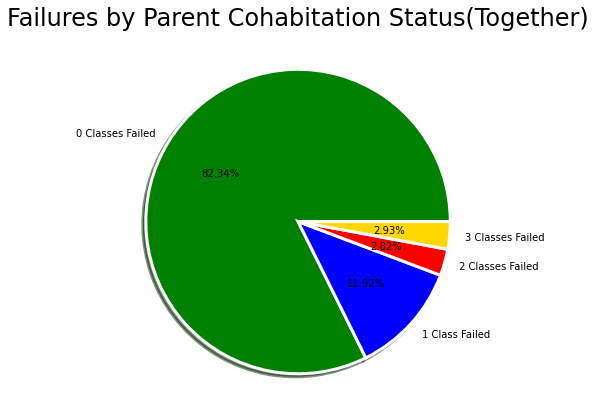

In [10]:
# Creating dataset (Apart)
colors = ["blue","red", "green", "gold"]
Num_Failures = ['0 Classes Failed', '1 Class Failed', '2 Classes Failed','3 Classes Failed']
  
data = [101, 10, 7, 3]
  
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = Num_Failures, autopct="%1.2f%%", colors=colors, shadow=True, wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'})
plt.title("Failures by Parent Cohabitation Status(Apart)", fontsize=24 )  
# show plot
plt.show()

# Creating dataset (Together)
colors = ["green", "blue","red", "gold"]
Num_Failures = ['0 Classes Failed', '1 Class Failed', '2 Classes Failed','3 Classes Failed']
  
data = [760, 110, 26, 27]
  
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = Num_Failures, autopct="%1.2f%%", colors=colors, shadow=True, wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'})
plt.title("Failures by Parent Cohabitation Status(Together)", fontsize=24 )  
# show plot
plt.show()

In [11]:
#Created a column of all three grades averaged
averageGrades = mergeddata.loc[:, ["G1", "G2", "G3"]].mean(axis=1)
averageGradesDF = pd.DataFrame(averageGrades, columns = ["Avg_Grades"])
averageGradesDF

,Avg_Grades
0,5.666667
1,5.333333
2,8.333333
3,14.666667
4,8.666667
...,...
644,10.333333
645,15.333333
646,10.666667
647,10.000000


In [12]:
mergeddata["Avg_Grades"] = averageGradesDF
mergeddata.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,sourcefilename,Avg_Grades
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,student-mat.csv,5.666667
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,student-mat.csv,5.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,student-mat.csv,8.333333
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,student-mat.csv,14.666667
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,student-mat.csv,8.666667


In [13]:
#Create bins for avgGrade
grade_bins = [0, 11.9, 13.9, 15.9, 17.9, 100]
letter_grade = ["F", "D", "C", "B", "A"]

mergeddata["Letter Grade"] = pd.cut(mergeddata["Avg_Grades"], grade_bins, labels=letter_grade)
#del mergeddata['Grade Range']
mergeddata


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,...,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,sourcefilename,Avg_Grades,Letter Grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,...,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,student-mat.csv,5.666667,F
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,...,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,student-mat.csv,5.333333,F
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,...,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,student-mat.csv,8.333333,F
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,...,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,student-mat.csv,14.666667,C
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,...,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,student-mat.csv,8.666667,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,...,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10,student-por.csv,10.333333,F
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,...,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16,student-por.csv,15.333333,C
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,...,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9,student-por.csv,10.666667,F
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,...,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10,student-por.csv,10.000000,F


In [14]:
#Print the totals for each letter grade
pd.DataFrame(mergeddata["Letter Grade"].value_counts())

,Letter Grade
F,587
D,239
C,142
B,59
A,17


In [15]:
#Print the totals for yes/no
pd.DataFrame(mergeddata["internet"].value_counts())

,internet
yes,827
no,217


In [16]:
#Itemize each letter grade with yes/no counts

by_letter = mergeddata.groupby("Letter Grade").internet.value_counts(normalize=False)
by_letter

Letter Grade  internet
F             yes         440
              no          147
D             yes         196
              no           43
C             yes         127
              no           15
B             yes          49
              no           10
A             yes          15
              no            2
Name: internet, dtype: int64

In [29]:
#Dictionary created to help read values into bar graph
LGI_dict = {"Letter Grade":['F','D','C','B','A'],
            "no":[67.74,19.82,6.91,4.61,0.92],
            "yes":[53.20,23.70,15.36,5.93,1.82]}
            
            #"no":[0.250426, 0.179916, 0.105634, 0.169492, 0.117647],
            #"yes":[0.749574,0.820084,0.894366,0.830508,0.882353]}
            #"no":[147,43,15,10,2],
            #"yes":[440,196,127,49,15]}
by_letterDF = pd.DataFrame(LGI_dict)


In [18]:
by_letterDF2 = by_letterDF.set_index('Letter Grade')

In [19]:
by_letterDF2.head()

,no,yes
Letter Grade,,
F,67.74,53.20
D,19.82,23.70
C,6.91,15.36
B,4.61,5.93
A,0.92,1.82


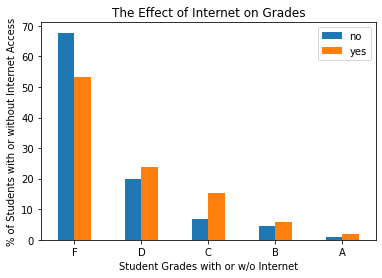

In [20]:
#Create bar graph that displays internet access per letter grade

multiPlot = by_letterDF2.plot(kind="bar")
multiPlot.set_xticklabels(by_letterDF["Letter Grade"], rotation=0)
plt.rcParams["figure.figsize"] = (12, 10)

plt.xlabel("Student Grades with or w/o Internet")
plt.ylabel("% of Students with or without Internet Access")
plt.title("The Effect of Internet on Grades")
plt.legend()

plt.show()

In [21]:
#Does parents level of Education(mother and father avg) effect study time. 
#What effect does study time have on students overall grade?

In [22]:
avgParentEdu = mergeddata.loc[:, ["Medu", "Fedu"]].mean(axis=1)
avgParentEduDF = pd.DataFrame(avgParentEdu, columns = ["Avg_Parents_Edu"])
avgParentEduDF

,Avg_Parents_Edu
0,4.0
1,1.0
2,1.0
3,3.0
4,3.0
...,...
644,2.5
645,2.0
646,1.0
647,2.0


In [23]:
mergeddata["Avg_Parents_Edu"] = avgParentEduDF
mergeddata.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,sourcefilename,Avg_Grades,Letter Grade,Avg_Parents_Edu
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,...,yes,no,no,4,3,4,1,1,3,6,5,6,6,student-mat.csv,5.666667,F,4.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,...,yes,yes,no,5,3,3,1,1,3,4,5,5,6,student-mat.csv,5.333333,F,1.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,...,yes,yes,no,4,3,2,2,3,3,10,7,8,10,student-mat.csv,8.333333,F,1.0
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,...,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,student-mat.csv,14.666667,C,3.0
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,...,yes,no,no,4,3,2,1,2,5,4,6,10,10,student-mat.csv,8.666667,F,3.0


In [24]:
mergeddata3=pd.DataFrame(mergeddata.loc[:, ["Avg_Parents_Edu", "Avg_Grades"]])
mergeddata3


,Avg_Parents_Edu,Avg_Grades
0,4.0,5.666667
1,1.0,5.333333
2,1.0,8.333333
3,3.0,14.666667
4,3.0,8.666667
...,...,...
644,2.5,10.333333
645,2.0,15.333333
646,1.0,10.666667
647,2.0,10.000000


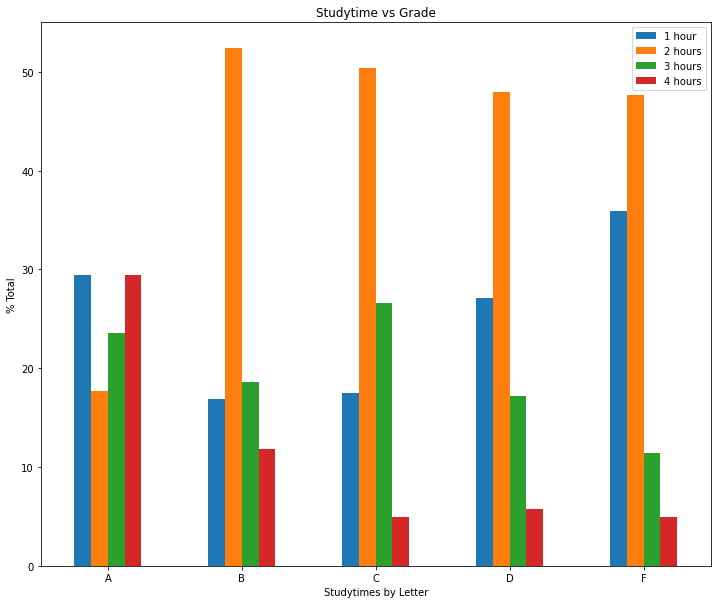

,1 hour,2 hours,3 hours,4 hours
Letter Grade,,,,
A,29.40,17.64,23.52,29.40
B,16.90,52.39,18.59,11.83
C,17.50,50.40,26.60,4.90
D,27.06,47.97,17.22,5.74
F,35.87,47.60,11.39,4.93


In [43]:
hoursStudyDict = {"Letter Grade":['A','B','C','D','F'],
        "1 hour":[5*5.88, 10*1.69, 25*0.70, 66*0.41, 211*0.17],
        "2 hours":[3*5.88, 31*1.69, 72*0.70, 117*0.41, 280*0.17],
        "3 hours":[4*5.88, 11*1.69, 38*0.70,42*0.41, 67*0.17],
        "4 hours":[5*5.88, 7*1.69, 7*0.70, 14*0.41, 29*0.17]
       }

hoursStudyDictDF = pd.DataFrame(hoursStudyDict)
hoursStudyDictDF2 = hoursStudyDictDF.set_index('Letter Grade')

multiPlot = hoursStudyDictDF2.plot(kind="bar")
multiPlot.set_xticklabels(hoursStudyDictDF["Letter Grade"], rotation=0)
plt.rcParams["figure.figsize"] = (12, 10)

plt.xlabel("Studytimes by Letter")
plt.ylabel("% Total")
plt.title("Studytime vs Grade")

plt.show()
dictDF2.head()


In [ ]:
#Does the time in which alcohol is consumed have an effect on students overall grade?